In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
# Load the dataset from csv file
df = pd.read_csv("data/house_data.csv")

In [3]:
# Display the first few rows of the dataset
df.head(5)

,Id,LotFrontage,LotArea,Street,Alley,Utilities,LotConfig,Neighborhood,Condition1,Condition2,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,65.0,8450,Pave,NaN,AllPub,Inside,CollgCr,Norm,Norm,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,80.0,9600,Pave,NaN,AllPub,FR2,Veenker,Feedr,Norm,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,68.0,11250,Pave,NaN,AllPub,Inside,CollgCr,Norm,Norm,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,60.0,9550,Pave,NaN,AllPub,Corner,Crawfor,Norm,Norm,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,84.0,14260,Pave,NaN,AllPub,FR2,NoRidge,Norm,Norm,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check for missing values
df.isnull().sum()

Id                  0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
Utilities           0
LotConfig           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
RoofStyle           0
RoofMatl            0
Exterior1st         0
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
TotalBsmtSF         0
Heating             0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
FullBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
GarageType         81
GarageArea          0
GarageCond         81
PavedDrive          0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal   

In [7]:
# Summary statistics of numerical features
df.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,103.685262,1057.429452,1162.626712,346.992466,...,2.866438,1.046575,6.517808,0.613014,472.980137,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,181.066207,438.705324,386.587738,436.528436,...,0.815778,0.220338,1.625393,0.644666,213.804841,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,0.000000,795.750000,882.000000,0.000000,...,2.000000,1.000000,5.000000,0.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,0.000000,991.500000,1087.000000,0.000000,...,3.000000,1.000000,6.000000,1.000000,480.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,166.000000,1298.250000,1391.250000,728.000000,...,3.000000,1.000000,7.000000,1.000000,576.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,6110.000000,4692.000000,2065.000000,...,8.000000,3.000000,14.000000,3.000000,1418.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


c:\Users\jparep\anaconda3\envs\envhpp\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


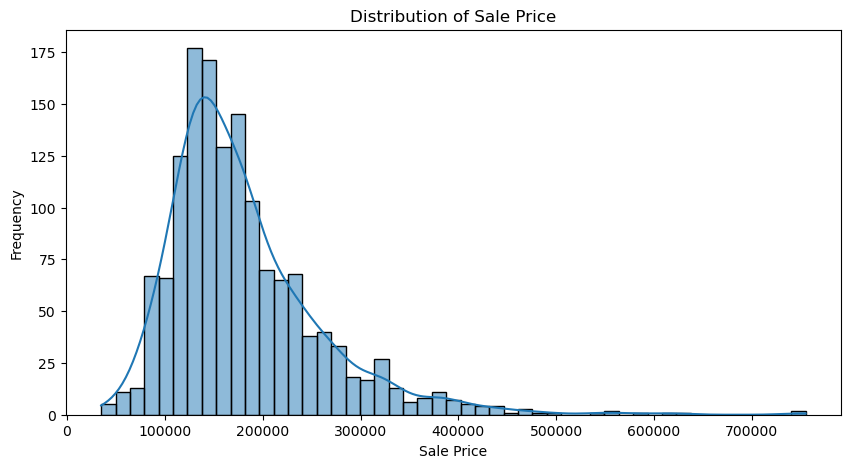

In [17]:
# Visualize the distribution of the target variable (house prices)
plt.figure(figsize=(10,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

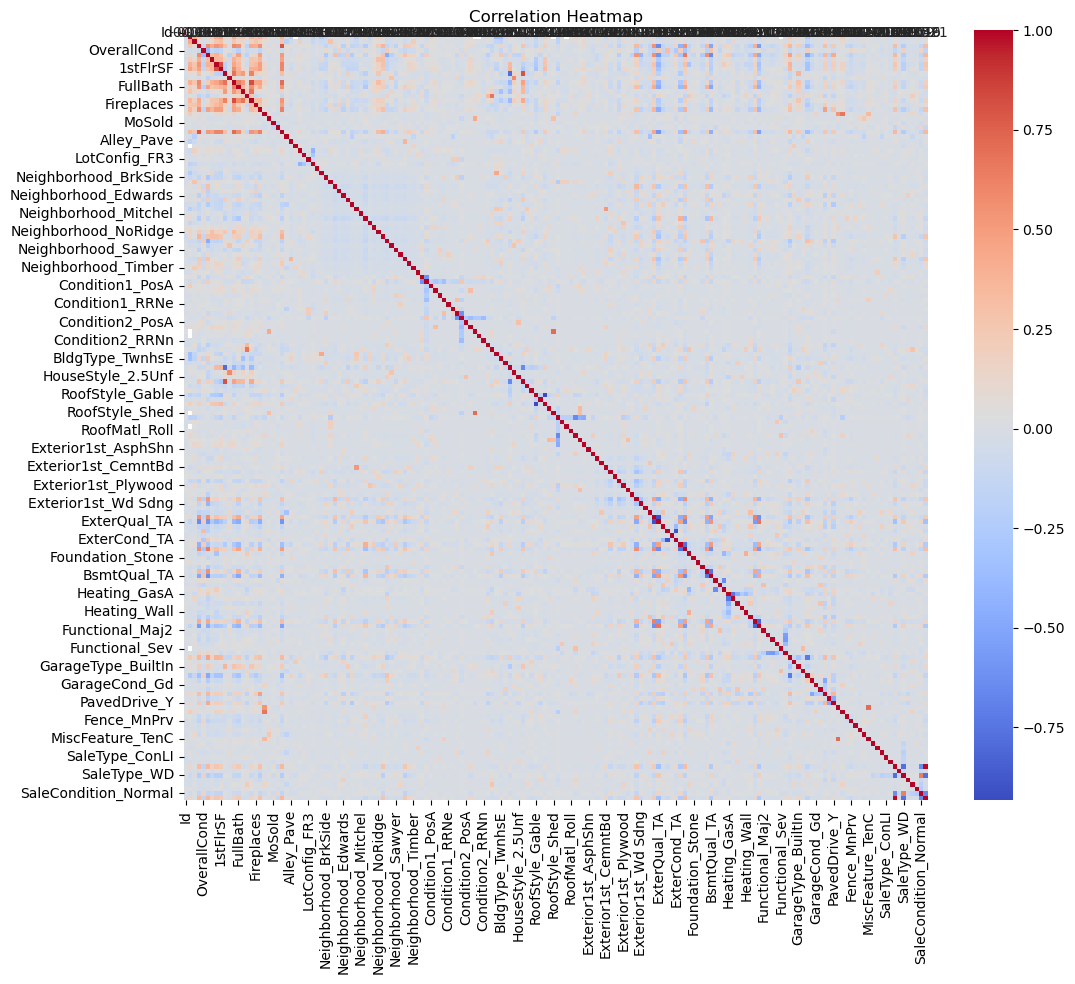

In [32]:
# Correlation heatmap to check the relationship between numerical features and target variable
cmax = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cmax,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

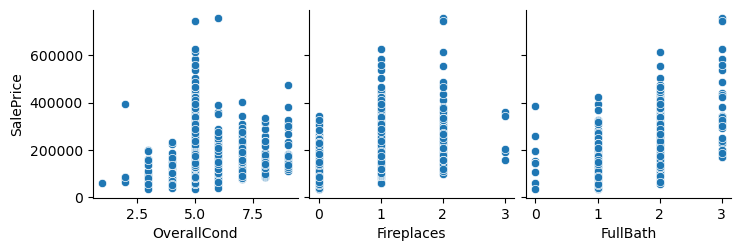

In [33]:
# Pairplot for scatter plots between numerical features and target variable
sns.pairplot(df,x_vars=['OverallCond','Fireplaces','FullBath'],y_vars=['SalePrice'])
plt.show()